In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import glob 
import os
from collections import defaultdict


In [3]:
def time_spent_dimers(df):
    t_rows=df.shape[0]
    durations=[]
    current_size=None
    start_time=None
    for i in range(t_rows):
        if current_size is None:
            current_size=df['NE'].iloc[i]
            start_time=df['sweep'].iloc[i]
        elif df['NE'].iloc[i]!=current_size:
            durations.append((current_size,df['sweep'].iloc[i]-start_time+1))
            current_size=df['NE'].iloc[i]
            start_time=df['sweep'].iloc[i]
    if current_size is not None:
      durations.append((current_size,df['sweep'].iloc[-1]-start_time))
    totaltime=df['sweep'].iloc[-1]-df['sweep'].iloc[0]
    #sum_second_element=defaultdict(int)
    #for first, second in durations:
    #    sum_second_element[first]+=second
    #newhist=[(first,sum_second_element[first]) for first in sum_second_element]
    #number_of_dimers =np.array([item[0] for item in newhist])
    #frequency=np.array([item[1] for item in newhist])
    del t_rows, current_size
    return durations, totaltime
    

In [3]:
def time_spent_dimers_AB_CD(df):
    t_rows=df.shape[0]
    durations=[]
    current_size=None
    start_time=None
    for i in range(t_rows):
        if current_size is None:
            current_size=df['NAB'].iloc[i]
            start_time=df['sweep'].iloc[i]
        elif df['NAB'].iloc[i]!=current_size:
            durations.append((current_size,df['sweep'].iloc[i]-start_time+1))
            current_size=df['NAB'].iloc[i]
            start_time=df['sweep'].iloc[i]
    if current_size is not None:
      durations.append((current_size,df['sweep'].iloc[-1]-start_time))
    totaltime=df['sweep'].iloc[-1]-df['sweep'].iloc[0]
    #sum_second_element=defaultdict(int)
    #for first, second in durations:
    #    sum_second_element[first]+=second
    #newhist=[(first,sum_second_element[first]) for first in sum_second_element]
    #number_of_dimers =np.array([item[0] for item in newhist])
    #frequency=np.array([item[1] for item in newhist])
    del t_rows, current_size
    return durations, totaltime
    

In [3]:
def time_spent_drug(df):

    t_rows=df.shape[0]
    durations=[]
    current_size=None
    start_time=None
    for i in range(t_rows):
        if current_size is None:
            current_size=df['ndrug'].iloc[i]
            start_time=df['sweep'].iloc[i]
        elif df['ndrug'].iloc[i]!=current_size:
            durations.append((current_size,df['sweep'].iloc[i]-start_time+1))
            current_size=df['ndrug'].iloc[i]
            start_time=df['sweep'].iloc[i]
    if current_size is not None:
      durations.append((current_size,df['sweep'].iloc[-1]-start_time))
    
    totaltime=df['sweep'].iloc[-1]-df['sweep'].iloc[0]
    #sum_second_element=defaultdict(int)
    #for first, second in durations:
    #    sum_second_element[first]+=second
    #newhist=[(first,sum_second_element[first]) for first in sum_second_element]
    #number_of_dimers =np.array([item[0] for item in newhist])
    #frequency=np.array([item[1] for item in newhist])
    del t_rows, current_size
    return durations, totaltime
    

In [4]:
def combine_two_lists(list1,list2):
    combined_dict={}

# Populate the dictionaries by adding the second elements when the first element is common
    for item in list1:
        key = item[0]
        value = item[1]
        if key in combined_dict:
            combined_dict[key] += value
        else:
            combined_dict[key] = value

    for item in list2:
        key = item[0]
        value = item[1]
        if key in combined_dict:
            combined_dict[key] += value
        else:
            combined_dict[key] = value

    # Convert the combined dictionary back to a list of tuples
    del list1,list2
    result_list = [(key, value) for key, value in combined_dict.items()]
    return result_list




In [ ]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()

total_hist_drug=[]

total_time_drug=0
energyfiles_worknew=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/*txt')

count_files=[]
count_chunks=0
for file in energyfiles_worknew[0:100]:
    count=0
    df=pd.read_csv(file,delim_whitespace=True,header=None,names=['sweep','ndrug','NE'],chunksize=100000)
    for chunk in df:
        count_chunks+=1
        try:
            chunk=chunk.sort_values(by='sweep')
            chunk_5=chunk[chunk['NE']==6]
            if(len(chunk_5)>0):
                count+=len(chunk_5)
                
                hist1, time_spent=time_spent_drug(chunk_5)
                total_hist_drug=combine_two_lists(hist1,total_hist_drug)
                total_time_drug+=time_spent
            del chunk_5
        except:
            continue
        del chunk
    if(count>75000):
        print(file,count)
    count_files.append(count)
    del df
print(count)
print(count_chunks)


/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/SM-dmu--4.5_Rmudrug--10.1_kd-0.0001_70.dat.txt 75918
/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/SM-dmu--4.5_Rmudrug--10.1_kd-0.0001_91.dat.txt 85650
/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/SM-dmu--4.5_Rmudrug--10.1_kd-0.0001_89.dat.txt 85070
/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/SM-dmu--4.5_Rmudrug--10.1_kd-0.0001_96.dat.txt 86938
/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/SM-dmu--4.5_Rmudrug--10.1_kd-0.0001_83.dat.txt 83016
/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/SM-dmu--4.5_Rmudrug--10.1_kd-0.0001_92.dat.txt 85755
/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5

In [81]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()
ndrugfiles_worknew=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/*txt')
count_files3=pd.DataFrame()
count_files5=pd.DataFrame()
for file_num,file in enumerate(ndrugfiles_worknew[0:2]):
    df=pd.read_csv(file,delim_whitespace=True,header=None,names=['sweep','ndrug','NE'],chunksize=100000)
    count_dftotal=0
    count_series3=0
    count_series5=0
    for chunk in df:
        count_dftotal+=len(chunk)
        chunk_df3ne=chunk[chunk['NE']==6]
        count_drug3=chunk_df3ne['ndrug'].value_counts()
        count_series3=count_series3+count_drug3
        del count_drug3
        del chunk_df3ne
        chunk_df5ne=chunk[chunk['NE']==10]
        count_drug5=chunk_df5ne['ndrug'].value_counts()
        count_series5=count_series5+count_drug5
        del count_drug5
        del chunk_df5ne
        #chunk5=chunk_df5ne[chunk_df5ne['ndrug']==4]
        #count_df5+=len(chunk5)
        #del chunk5
        #del chunk_df5ne
        #del chunk
    #print(count_df3/count_dftotal)
    count_df3=count_series3.reset_index()
    count_df3['3_drugfrac']=count_df3['count']/count_df3['count'].sum()
    count_df5=count_series5.reset_index()
    count_df5['5_drugfrac']=count_df5['count']/count_df5['count'].sum()
    count_df3['file_num']=file_num
    count_df5['file_num']=file_num
    count_files3=pd.concat((count_files3,count_df3),ignore_index=True)
    count_files5=pd.concat((count_files5,count_df5),ignore_index=True)
    #count_files.append((file_num,(count_df3/count_dftotal), (count_df5/count_dftotal)))
    del df
print(count_files3)
print(count_files5)

   ndrug   count  3_drugfrac  file_num
0      0   11968    0.032990         0
1      1   21052    0.058029         0
2      2   22132    0.061006         0
3      3  307630    0.847975         0
4      0   10037    0.032321         1
5      1   17226    0.055471         1
6      2   17624    0.056753         1
7      3  265651    0.855454         1
    ndrug  count  5_drugfrac  file_num
0       0     25    0.000757         0
1       1   1312    0.039743         0
2       2   1685    0.051042         0
3       3   3324    0.100691         0
4       4   9871    0.299012         0
5       5  10519    0.318642         0
6       6   6276    0.190113         0
7       0     23    0.000824         1
8       1   1095    0.039242         1
9       2   1248    0.044725         1
10      3   2641    0.094646         1
11      4   8827    0.316335         1
12      5   9157    0.328161         1
13      6   4913    0.176068         1


In [82]:
import seaborn as sns
merged_df=pd.merge(count_files3,count_files5,on='file_num')
print(merged_df)


    ndrug_x  count_x  3_drugfrac  file_num  ndrug_y  count_y  5_drugfrac
0         0    11968    0.032990         0        0       25    0.000757
1         0    11968    0.032990         0        1     1312    0.039743
2         0    11968    0.032990         0        2     1685    0.051042
3         0    11968    0.032990         0        3     3324    0.100691
4         0    11968    0.032990         0        4     9871    0.299012
5         0    11968    0.032990         0        5    10519    0.318642
6         0    11968    0.032990         0        6     6276    0.190113
7         1    21052    0.058029         0        0       25    0.000757
8         1    21052    0.058029         0        1     1312    0.039743
9         1    21052    0.058029         0        2     1685    0.051042
10        1    21052    0.058029         0        3     3324    0.100691
11        1    21052    0.058029         0        4     9871    0.299012
12        1    21052    0.058029         0        5

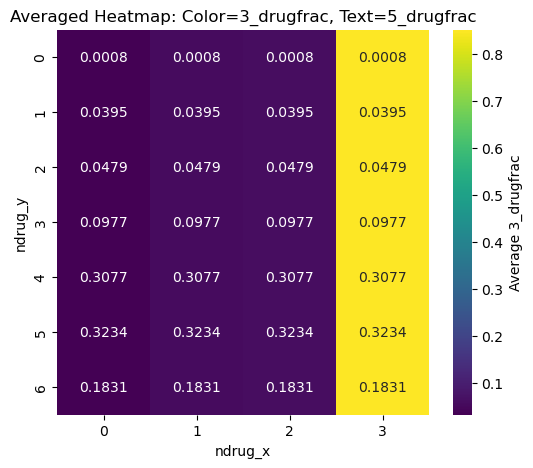

In [83]:
# Average across all file_nums
avg_df = merged_df.groupby(["ndrug_x", "ndrug_y"], as_index=False).mean()

# Pivot for heatmap
color_matrix = avg_df.pivot(index="ndrug_y", columns="ndrug_x", values="3_drugfrac")
annot_matrix = avg_df.pivot(index="ndrug_y", columns="ndrug_x", values="5_drugfrac")

plt.figure(figsize=(6,5))
sns.heatmap(
    color_matrix,
    cmap="viridis",
    annot=annot_matrix.round(4),  # annotations are 5_drugfrac
    fmt="",
    cbar_kws={"label": "Average 3_drugfrac"}
)
plt.title("Averaged Heatmap: Color=3_drugfrac, Text=5_drugfrac")
plt.xlabel("ndrug_x")
plt.ylabel("ndrug_y")
plt.show()


(0, 0.6587775257992466, 0.02113835762820389)
0 0.6587775257992466 0.02113835762820389
(1, 0.669120814075035, 0.022233416873417882)
1 0.669120814075035 0.022233416873417882
(2, 0.6744010940164524, 0.02185921809724643)
2 0.6744010940164524 0.02185921809724643
(3, 0.6671098923228184, 0.02249789739276703)
3 0.6671098923228184 0.02249789739276703
(4, 0.6813423394763515, 0.02348576205730689)
4 0.6813423394763515 0.02348576205730689


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.]]),
 array([0.0130818 , 0.03161351, 0.05014523, 0.06867695, 0.08720866,
        0.10574038, 0.1242721 , 0.14280382, 0.16133553, 0.17986725,
        0.19839897, 0.21693068, 0.2354624 , 0.25399412, 0.27252584,
        0.29105755, 0.30958927, 0.32812099, 0.3466527 , 0.36518442,
        0.38371614, 0.40224785, 0.42077957, 0.43931129, 0.45784301,
        0.47637472, 0.49490644, 0.51343816, 0.53196987, 0.55050159,
        0.56903331, 0.58756503, 0.60609674, 0.62462846, 0.64316018,
        0.66169189, 0.68022361, 0.69875533, 0.71728705, 0.73581876,
        0.75435048]),
 array([0.01992834, 0.02053072, 0.02113311, 0.02173549, 0.02233788,
        0.02294027, 0.02354265, 0.02414504, 0.02474742, 0.02534981,
        0.0259522 , 0.02655458, 0.02715697, 0.027

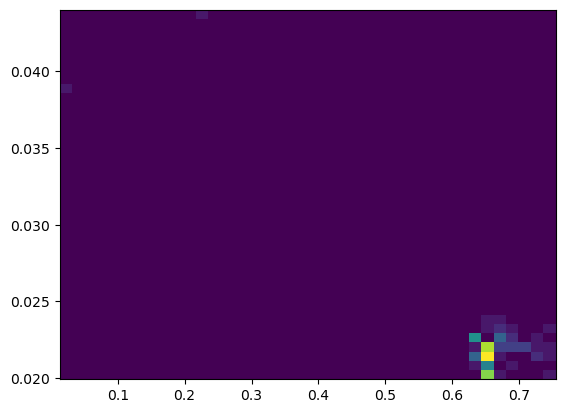

In [35]:
for item in count_files[0:5]:
    print(item)
    print(item[0],item[1],item[2])
plt.hist2d([item[1] for item in count_files],[item[2] for item in count_files],bins=40)

In [12]:
print(count_files)
print(np.sort(count_files))

[33012, 27904, 29571, 24792, 19760, 21533, 38132, 32838, 8401, 75918, 37007, 50301, 85650, 85070, 32155, 67930, 86938, 42203, 1589, 12110, 57701, 3139, 2381, 4002, 40156, 70719, 55979, 7168, 51110, 67199, 14755, 83016, 41501, 71578, 57267, 68312, 21466, 15871, 85755, 9573, 85130, 43444, 55870, 46974, 52349, 61047, 85135, 29897, 11812, 57520, 34084, 27725, 57758, 63932, 19863, 47725, 72274, 48039, 6952, 10690, 14144, 12241, 82008, 40115, 70163, 49546, 49928, 80214, 27382, 50858, 25112, 60208, 48535, 3541, 84009, 74987, 81948, 75007, 6468, 86820, 44327, 70762, 31996, 46120, 33781, 2623, 54209, 86371, 26910, 59368, 73691, 23310, 58187, 29736, 65345, 5181, 700, 42069, 21467, 82345]
[  700  1589  2381  2623  3139  3541  4002  5181  6468  6952  7168  8401
  9573 10690 11812 12110 12241 14144 14755 15871 19760 19863 21466 21467
 21533 23310 24792 25112 26910 27382 27725 27904 29571 29736 29897 31996
 32155 32838 33012 33781 34084 37007 38132 40115 40156 41501 42069 42203
 43444 44327 46120 46

In [14]:
print(len(count_files))

100


In [20]:
print(total_time_drug)

625630000


Text(0.5, 1.0, 'Time spent array: [2.34764753e-04 1.12120644e-02 1.40019740e-02 4.96422432e-02\n 7.57501218e-01 9.65628606e-02 7.08588267e-02]')

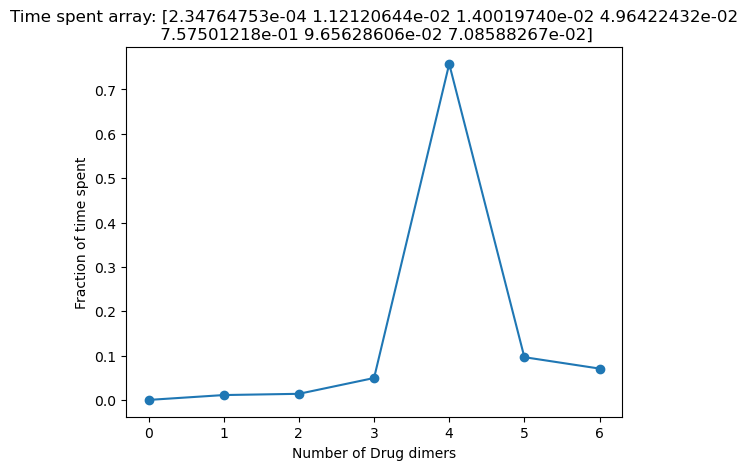

In [6]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()
plt.plot([item[0] for item in total_hist_drug],[item[1]/total_time_drug for item in total_hist_drug],'o-')
plt.xlabel('Number of Drug dimers')
plt.ylabel('Fraction of time spent')
timespent_array=np.array([item[1]/total_time_drug for item in total_hist_drug])
plt.title(f'Time spent array: {timespent_array}')

In [ ]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()

total_hist=[]
count=0
total_time=0
energyfiles_worknew=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/*dat')
#energyfiles_mac=glob.glob('/Users/smritipradhan/Desktop/send_worknew/SE-DMU--3.5_Rmudrug--10.1_kd-0.0001/*dat')
print(len(energyfiles_worknew))
for file in energyfiles_worknew[0:10]:
    df=pd.read_csv(file,sep=',',usecols=['sweep','NE'],chunksize=100000)
    for chunk in df:
        if(chunk['NE'].iloc[-1]>3):
            hist1, time_spent=time_spent_dimers(chunk)
            total_hist=combine_two_lists(hist1,total_hist)
            total_time+=time_spent
        else:
            continue
        del chunk
    del df

/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001-seed-1-energy.dat
/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/stdsalt_ndrug/SM-dmu--4.5_Rmudrug--10.1_kd-0.0001_1.dat.txt


'""\n#energyfiles_mac=glob.glob(\'/Users/smritipradhan/Desktop/send_worknew/SE-DMU--3.5_Rmudrug--10.1_kd-0.0001/*dat\')\nprint(len(energyfiles_worknew))\nfor file in energyfiles_worknew[0:10]:\n    df=pd.read_csv(file,sep=\',\',usecols=[\'sweep\',\'NE\'],chunksize=100000)\n    for chunk in df:\n        if(chunk[\'NE\'].iloc[-1]>3):\n            hist1, time_spent=time_spent_dimers(chunk)\n            total_hist=combine_two_lists(hist1,total_hist)\n            total_time+=time_spent\n        else:\n            continue\n        del chunk\n    del df\n    '

In [42]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()

total_hist_AB=[]
count=0
total_time_AB=0
energyfiles_worknew=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/*dat')
#energyfiles_mac=glob.glob('/Users/smritipradhan/Desktop/send_worknew/SE-DMU--3.5_Rmudrug--10.1_kd-0.0001/*dat')
print(len(energyfiles_worknew))
count=0
count_chunks=0
for file in energyfiles_worknew[0:100]:
    df=pd.read_csv(file,sep=',',usecols=['sweep','NE','NAB'],chunksize=100000)
    for chunk in df:
        count_chunks+=1
        try:
            chunk_5=chunk[chunk['NE']==5]
            if(len(chunk_5)>0):
                count+=1
                hist1, time_spent=time_spent_dimers_AB_CD(chunk_5)
                total_hist_AB=combine_two_lists(hist1,total_hist_AB)
                total_time_AB+=time_spent
            del chunk_5
        except:
            continue
        del chunk
    del df
print(count)
print(count_chunks)

224
117
3698


Text(0.5, 1.0, 'Time spent array: [0.97303562 0.00192741 0.02381419 0.00122539]')

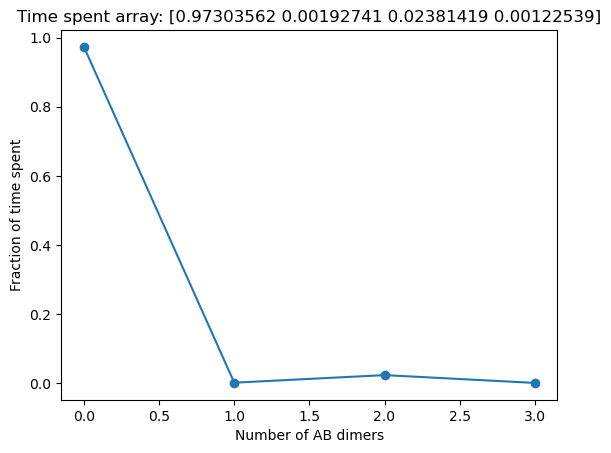

In [41]:
plt.plot([item[0] for item in total_hist_AB],[item[1]/total_time_AB for item in total_hist_AB],'o-')
plt.xlabel('Number of AB dimers')
plt.ylabel('Fraction of time spent')
timespent_array=np.array([item[1]/total_time_AB for item in total_hist_AB])
plt.title(f'Time spent array: {timespent_array}')

In [11]:
energyfiles_worknew=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/*dat')

df_AB_CD=pd.DataFrame()
for file in energyfiles_worknew[0:100]:
    df=pd.read_csv(file,sep=',',usecols=['sweep','NE','NAB','NCD_Hex','NCD_T4'],chunksize=100000)
    for chunk in df:
        chunk_5=chunk[chunk['NE']==5]
        df_AB_CD=pd.concat([df_AB_CD,chunk_5])
        del chunk
    del df


NCD_Hex
1    439913
0      5148
Name: count, dtype: int64


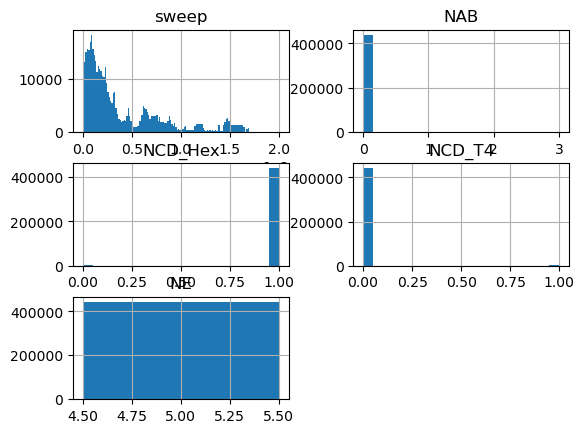

In [19]:
df_AB_CD.hist(bins='auto')
print(df_AB_CD['NCD_Hex'].value_counts())

In [6]:
from IPython.display import clear_output
clear_output(wait=True)
import gc
gc.collect()
number_of_dimers =np.array([item[0] for item in total_hist])
frequency=np.array([item[1] for item in total_hist])
dimer_frequency_df=pd.DataFrame()
dimer_frequency_df['Ndimer']=number_of_dimers
dimer_frequency_df['timespent']=frequency
dimer_frequency_df_sorted=dimer_frequency_df.sort_values(by='Ndimer')
new_number_of_dimers=np.asarray(dimer_frequency_df_sorted['Ndimer'])
new_frequency=np.asarray(dimer_frequency_df_sorted['timespent'])
dimer_frequency_df_sorted.to_csv('~/BigStorage/figs_movies_KMC/kmc_paper2025/stdsalt_drug.csv',index=False)

<BarContainer object of 452 artists>

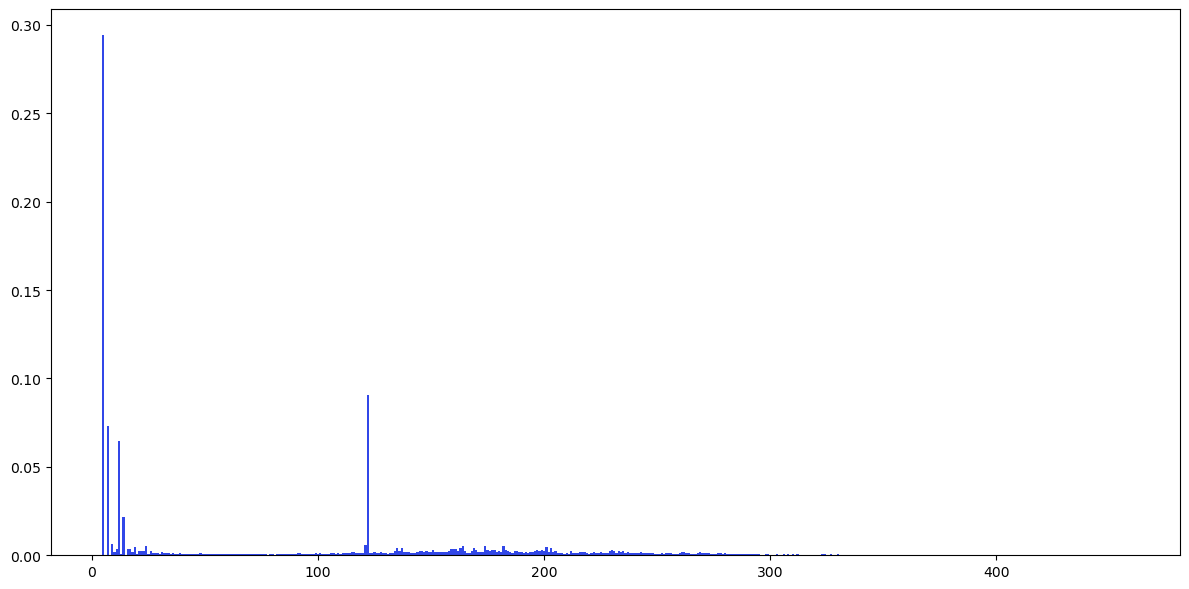

In [7]:
color2=(0.1, # redness
         0.2, # greenness
         0.9, # blueness
         0.9 # transparency
         )         
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
ax.bar(new_number_of_dimers[1:], new_frequency[1:]/(total_time-new_frequency[0]), color=color2, width=1,label='with drug assembly')

In [8]:
total_histwodrug=[]
countwodrug=0
total_timewodrug=0
energyfileswodrug=glob.glob('/home/smriti/BigStorage/old_computer_work/Desktop/KMC_HBV/MC_HEVA/allEnergyFiles/DMU--4.5_RGB--6.0_MU--10.8/*dat')

for file in energyfileswodrug[0:100]:
    df=pd.read_csv(file,sep=',',chunksize=100000)
    for chunk in df:
        if(chunk['NE'].iloc[-1]>3):
            chunk_start=chunk['sweep'].iloc[0]
            chunk_end=chunk['sweep'].iloc[-1]
            hist1, time_spent=time_spent_dimers(chunk)
            total_histwodrug=combine_two_lists(hist1,total_histwodrug)
            total_timewodrug+=time_spent
        del chunk
    del df
print(total_histwodrug)
print(total_timewodrug)
number_of_dimers_wodrug =np.array([item[0] for item in total_histwodrug])
frequency_wodrug=np.array([item[1] for item in total_histwodrug])
dimer_frequency_df_wodrug=pd.DataFrame()
dimer_frequency_df_wodrug['Ndimer']=number_of_dimers_wodrug
dimer_frequency_df_wodrug['timespent']=frequency_wodrug
dimer_frequency_df_sorted_wodrug=dimer_frequency_df_wodrug.sort_values(by='Ndimer')
new_number_of_dimers_wodrug=np.asarray(dimer_frequency_df_sorted_wodrug['Ndimer'])
new_frequency_wodrug=np.asarray(dimer_frequency_df_sorted_wodrug['timespent'])
dimer_frequency_df_sorted_wodrug.to_csv('std_salt_wo_drug.csv',index=False)

[(3, 172684017), (5, 962421), (7, 337845), (9, 161861), (10, 8243014), (12, 12143459), (14, 6998048), (16, 1994768), (18, 337241), (11, 61252), (13, 13543), (20, 28844), (17, 240944), (19, 288521), (21, 160969), (23, 94638), (26, 1794175), (28, 672426), (30, 157988), (22, 1242547), (24, 2400927), (29, 123795), (31, 108826), (32, 63382), (34, 154727), (35, 1106944), (37, 866111), (33, 675728), (39, 342841), (41, 174356), (42, 116222), (44, 428840), (43, 96296), (45, 165630), (46, 807388), (48, 591981), (50, 292467), (52, 128525), (47, 217459), (49, 194872), (51, 140229), (53, 69786), (54, 97006), (56, 66297), (57, 800492), (60, 83783), (62, 91598), (63, 128626), (65, 411575), (66, 320360), (68, 430065), (70, 350762), (71, 123732), (73, 97696), (75, 96727), (74, 140130), (76, 763619), (77, 87491), (78, 821982), (80, 470053), (82, 279612), (81, 113203), (83, 101486), (84, 207239), (85, 89092), (86, 428708), (88, 469849), (90, 327381), (92, 190226), (93, 141925), (94, 139407), (95, 272340)

In [7]:
df_std_wodrug=pd.read_csv('~/BigStorage/figs_movies_KMC/kmc_paper2025/std_salt_wo_drug.csv')
df_std_wdrug=pd.read_csv('~/BigStorage/figs_movies_KMC/kmc_paper2025/stdsalt_drug.csv')
print(df_std_wdrug.head())
print(df_std_wodrug.head())

   Ndimer   timespent
0       3  2503841177
1       5   400057957
2       7    99286970
3       9     8985252
4      10     2232400
   Ndimer  timespent
0       3  172684017
1       5     962421
2       7     337845
3       9     161861
4      10    8243014


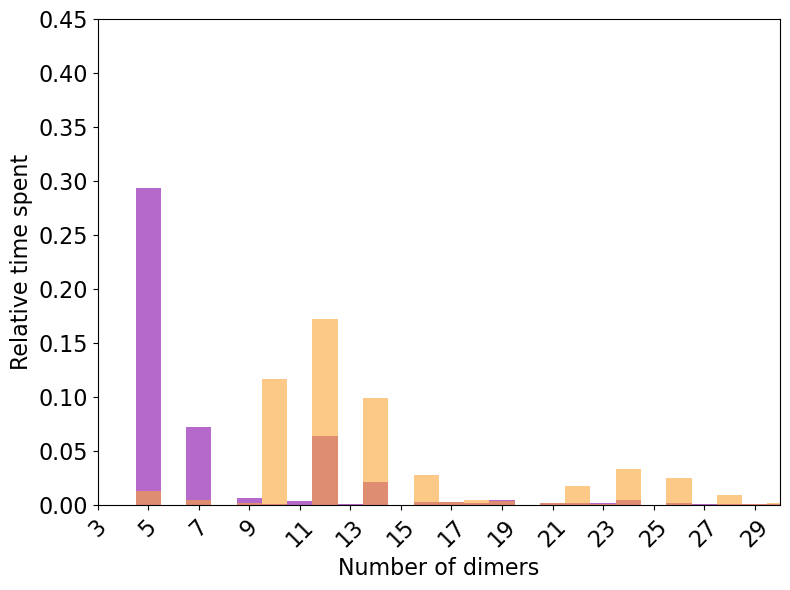

In [29]:

import matplotlib as mpl
color = (0.8, # redness
         0.2, # greenness
         0.2, # blueness
         0.9 # transparency
         ) 
color2=(0.1, # redness
         0.2, # greenness
         0.9, # blueness
         0.9 # transparency
         )        
markerarray=mpl.colormaps['plasma'](np.linspace(0,0.8,4))
color_wodrug=markerarray[3]
color_wdrug=markerarray[1]
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
wdrug_freq_list=df_std_wdrug['timespent'][1:]/(df_std_wdrug['timespent'].sum()-df_std_wdrug['timespent'][0])
ax.bar(df_std_wdrug['Ndimer'][1:], [val for val in wdrug_freq_list], color=color_wdrug, width=1,label='with drug assembly',alpha=0.6)
wodrug_freq_list = df_std_wodrug['timespent'][1:] / (df_std_wodrug['timespent'].sum() - df_std_wodrug['timespent'][0])
ax.bar(df_std_wodrug['Ndimer'][1:], [val for val in wodrug_freq_list], color=color_wodrug, width=1,label='without drug assembly',alpha=0.6)
ax.set_xlim(3, 30)
#ax.set_ylim(0, 0.25)
#ax.set_title("Most frequent shell size at moderate salt without drug  and std salt with drug", fontsize=18)
ax.set_xlabel("Number of dimers", fontsize=16)
ax.set_xticks(np.arange(3, 30, step=2))
ax.set_yticks(np.arange(0, 0.5, step=0.05))
ax.tick_params(axis='x', labelrotation=45, labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("Relative time spent", fontsize=16)
#plt.legend(fontsize=16, loc='upper right')
# Add right-side y-axis
#ax2 = ax.twinx()
#ax2.set_ylim(ax.get_ylim())  # Match y-limits
#ax2.set_yticks(ax.get_yticks()) 
#yticks_right= ax.get_yticks()  # multiply by 4 to get actual values
#ax2.set_yticklabels([f"{val:.3f}" for val in yticks_right])
#ax2.set_ylabel("Relative time spent (with drug)", fontsize=16)
#ax2.tick_params(axis='y', labelsize=16)


plt.savefig('/home/smriti/BigStorage/figs_movies_KMC/kmc_paper2025/figs_kmcpaper_2025/assembly_frequency_std_truncated.png', dpi=300)
plt.savefig('/home/smriti/BigStorage/figs_movies_KMC/kmc_paper2025/figs_kmcpaper_2025/assembly_frequency_std_truncated.svg', dpi=300)

In [16]:
combined_df=pd.DataFrame()
for files in energyfiles[0:90]:
    df=pd.read_csv(files, sep=',')
    #df = df.drop(df[df['NE'] <= 3].index)
    #print(df.head)
    #if(df['NE'].iloc[-1]==120):
    combined_df=pd.concat([combined_df,df])






: 

In [14]:
print(combined_df['NE'].unique())

[  3   5   7   9  11  12  10  14  16  15  18  20  21  23  19  17  25  24
  22  26  28  30  32  33  35  36  34  37  38  40  41  45  46  48  49  51
  54  56  57  59  55  60  62  64  63  65  67  68  66  70  72  74  76  77
  75  78  80  81  83  84  86  87  88  90  93  95  97  99 100 101 103 104
 105 107 109 110 112 113 114 115 117 118 120  29  31  39  42  44  47  50
  53  61  69  71  73  79  82  85  89  91  92  94  96  98 102 108 111 119
 121  13  27  43  52 106  58 116 123 124 126 122 128]


Index(['sweep', 'seed', 'seconds', 'epsilon', 'kappa', 'kappaPhi', 'theta0',
       'theta1', 'gb0', 'mu', 'dmu', 'dg', 'theta2', 'energy',
       'binding_energy', 'Nv5', 'Nv6', 'NAB', 'NAB_in', 'NCD_Hex', 'NCD_other',
       'NVin', 'Nhein', 'NCD_T4_in', ' NCD_T3_in', 'NCD_T4', 'NCD_T3', 'Nv',
       'NE', 'Nsurf', 'Nboundary'],
      dtype='object')
[1 0]
[7]
[10]
[5 7]


Text(0.5, 1.0, 'Total elastic energy')

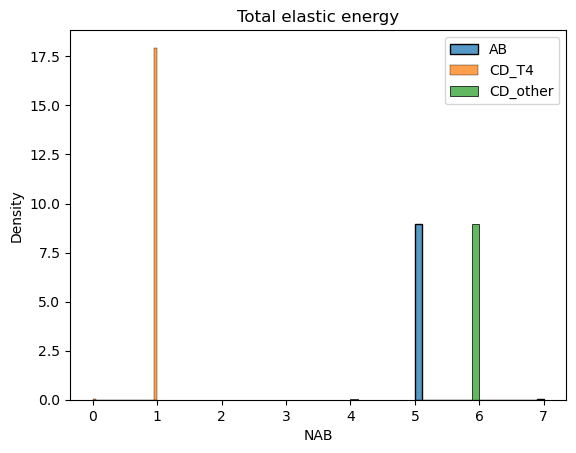

In [15]:
# Sizes: 10,12,14,16,22,24,26,33,44i
import seaborn as sns
df_filter=combined_df[combined_df['NE']==5]
df_filter2=combined_df[combined_df['NE']==12]
df_filter3=combined_df[combined_df['NE']==10]
print(df_filter.columns)
#df_filter=df_filter[df_filter['NAB']==5]
#print(df_filter.head())
#print(df_filter['Nsurf'].unique())
#print(df_filter['Nv6'].unique())
#print(dfs[0]['NVin'])
print(df_filter2['NCD_T4'].unique())
print(df_filter2['Nv'].unique())
print(df_filter2['Nhein'].unique())
print(df_filter2['NAB'].unique())
#print(df_filter['energy'].round(0).value_counts())
sns.histplot(df_filter2,x='NAB',stat='density',label='AB')
sns.histplot(df_filter2,x='NCD_T4',stat='density',label='CD_T4')
sns.histplot(df_filter2,x='NCD_other',stat='density',label='CD_other')
plt.legend()
plt.title('Total elastic energy')


/tmp/ipykernel_147196/1773276683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['NCDout']=df_filter['NCD_T4']-df_filter['NCD_T4_in']


            sweep    seed  seconds  epsilon   kappa  kappaPhi  theta0  theta1  \
NCD_T4_in                                                                       
0          128843  128843   128843   128843  128843    128843  128843  128843   

              gb0      mu  ...    NVin   Nhein   NCD_T3_in  NCD_T4  NCD_T3  \
NCD_T4_in                  ...                                               
0          128843  128843  ...  128843  128843      128843  128843  128843   

               Nv      NE   Nsurf  Nboundary  NCDout  
NCD_T4_in                                             
0          128843  128843  128843     128843  128843  

[1 rows x 31 columns]


/home/smriti/miniconda3/envs/mdaenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_147196/1773276683.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


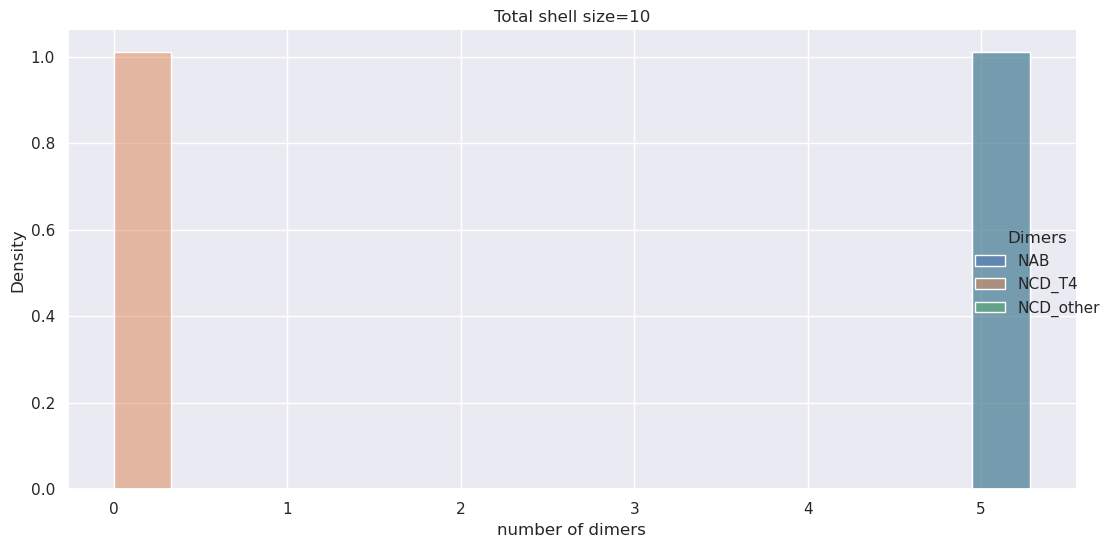

: 

In [25]:
import seaborn as sns
sns.set_theme()
df_filter=df_total[df_total['NE']==10]
df_filter['NCDout']=df_filter['NCD_T4']-df_filter['NCD_T4_in']
print(df_filter.groupby('NCD_T4_in').count())
selected_columns = ['NAB', 'NCD_T4','NCD_other'] 
data_melted = df_filter[selected_columns].melt(var_name="Dimers", value_name="number of dimers")

sns.displot(data_melted,x="number of dimers",hue="Dimers",alpha=0.5,stat="density",binwidth=0.33,height=6,aspect=10/6)
plt.rcParams.update({'font.size': 24})
plt.title("Total shell size=10")
plt.rc('figure', titlesize=30)
plt.tight_layout()
plt.savefig('e_10.png')



In [74]:
data_edges = {'Edge Type': ['AB', 'CD_other','NCD_T4','NCD_T3'], 'col2': [nABs,NCD_other, NCD4,NCD3]}
df = pd.DataFrame(data=data_edges)
print(df.head())

  Edge Type                                               col2
0        AB  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...
1  CD_other  [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...
2    NCD_T4  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
3    NCD_T3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


(-5.0, 10.0)

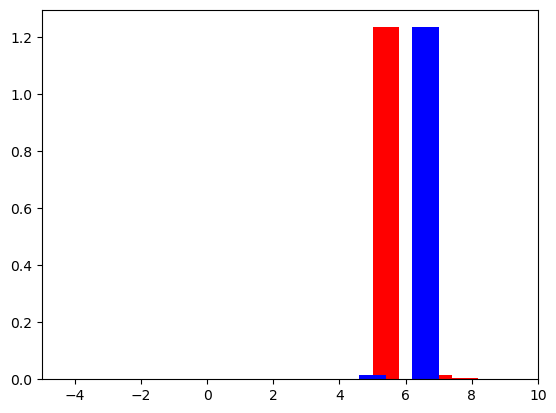

In [73]:

plt.hist(nABs,color='red',density=True,bins=5)
plt.hist(NCD_other,color='blue',density=True,bins=5)
plt.xlim(-5,10)

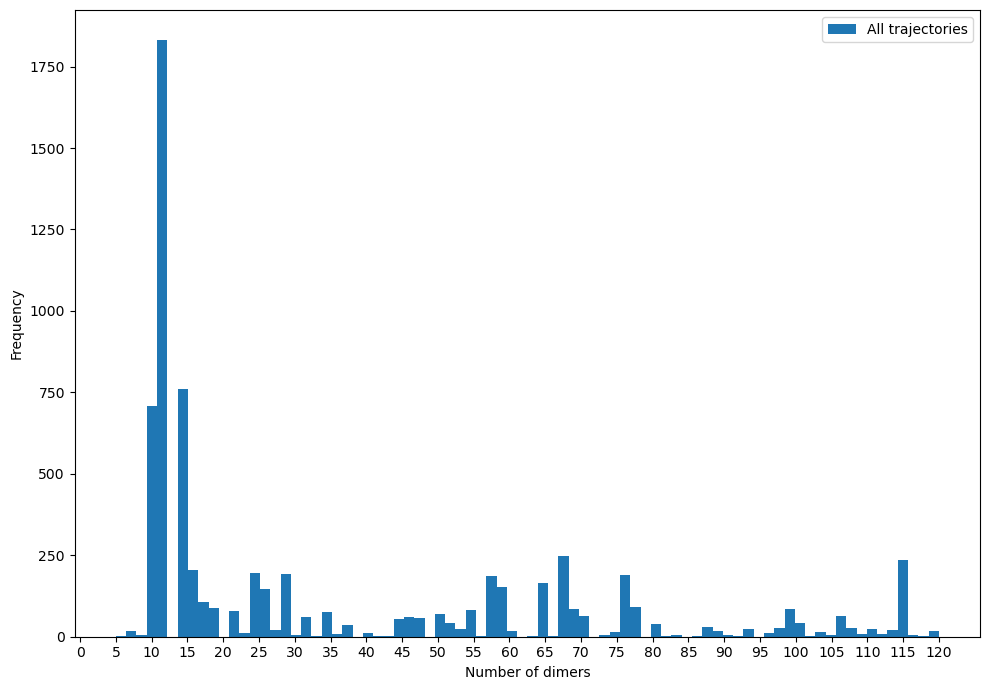

In [44]:
fig, axs = plt.subplots(1, 1,figsize =(10, 7),
                        tight_layout = True)
for files in energyfiles:
    df=pd.read_csv(files, sep=',')
    df = df.drop(df[df['NE'] <= 3].index)
    #if(df['NE'].iloc[-1]==120):
    combined_df=pd.concat([df])

plt.hist(combined_df['NE'],bins=80,label='All trajectories')

plt.xlabel('Number of dimers')
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 125, step=5))
plt.ylabel('Frequency')
plt.legend()
plt.savefig("Total.png")


In [43]:
# Sample lists of tuples
list1 = [("A", 10), ("B", 20), ("A", 30), ("C", 40), ("B", 50)]
list2 = [("A", 5), ("B", 15), ("C", 25), ("D", 35), ("A", 45)]

# Create dictionaries to store the accumulated values for each list
dict1 = {}
dict2 = {}

# Populate the dictionaries by adding the second elements when the first element is common
for item in list1:
    key = item[0]
    value = item[1]
    if key in dict1:
        dict1[key] += value
    else:
        dict1[key] = value

for item in list2:
    key = item[0]
    value = item[1]
    if key in dict2:
        dict2[key] += value
    else:
        dict2[key] = value

# Combine the dictionaries into a single dictionary
combined_dict = {}
for key, value in dict1.items():
    combined_dict[key] = value
for key, value in dict2.items():
    if key in combined_dict:
        combined_dict[key] += value
    else:
        combined_dict[key] = value

# Convert the combined dictionary back to a list of tuples
result_list = [(key, value) for key, value in combined_dict.items()]

print(result_list)


[('A', 90), ('B', 85), ('C', 65), ('D', 35)]


In [63]:
list1 = [("A", 10), ("B", 20), ("A", 30), ("C", 40), ("B", 50)]
list2 = [("A", 5), ("B", 15), ("C", 25), ("D", 35), ("A", 45)]
 # An empty list

# Create a dictionary to store the accumulated values
combined_dict = {}

# Populate the dictionary from list1
for item in list1:
    key = item[0]
    value = item[1]
    if key in combined_dict:
        combined_dict[key] += value
    else:
        combined_dict[key] = value

# Populate the dictionary from list2
for item in list2:
    key = item[0]
    value = item[1]
    if key in combined_dict:
        combined_dict[key] += value
    else:
        combined_dict[key] = value

# Convert the combined dictionary back to a list of tuples
result_list = [(key, value) for key, value in combined_dict.items()]

print(result_list)

[('A', 90), ('B', 85), ('C', 65), ('D', 35)]
